In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

%config InlineBackend.figure_format ='retina'

In [13]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    ax.set_title('Axes title')
    return ax


def plot_colored_lines(ax):
    """Plot lines with colors following the style color cycle."""
    t = np.linspace(-10, 10, 100)

    def sigmoid(t, t0):
        return 1 / (1 + np.exp(-(t - t0)))

    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shifts = np.linspace(-5, 5, nb_colors)
    amplitudes = np.linspace(1, 1.5, nb_colors)
    for t0, a in zip(shifts, amplitudes):
        ax.plot(t, a * sigmoid(t, t0), '-')
    ax.set_xlim(-10, 10)
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'](),
                           range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    ax.grid(visible=True)

    # Add title for enabling grid
    plt.title('ax.grid(True)', family='monospace', fontsize='small')

    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch."""
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)

    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    fig, axs = plt.subplots(ncols=6, nrows=1, num=style_label,
                            figsize=(14.8, 2.8), layout='constrained')

    # make a suptitle, in the same style for all subfigures,
    # except those with dark backgrounds, which get a lighter color:
    background_color = mcolors.rgb_to_hsv(
        mcolors.to_rgb(plt.rcParams['figure.facecolor']))[2]
    if background_color < 0.5:
        title_color = [0.8, 0.8, 1]
    else:
        title_color = np.array([19, 6, 84]) / 256
    fig.suptitle(style_label, x=0.01, ha='left', color=title_color,
                 fontsize=14, fontfamily='DejaVu Sans', fontweight='normal')

    plot_scatter(axs[0], prng)
    plot_image_and_patch(axs[1], prng)
    plot_bar_graphs(axs[2], prng)
    plot_colored_lines(axs[3])
    plot_histograms(axs[4], prng)
    plot_colored_circles(axs[5], prng)

    # add divider
    rec = Rectangle((1 + 0.025, -2), 0.05, 16,
                    clip_on=False, color='gray')

    axs[4].add_artist(rec)


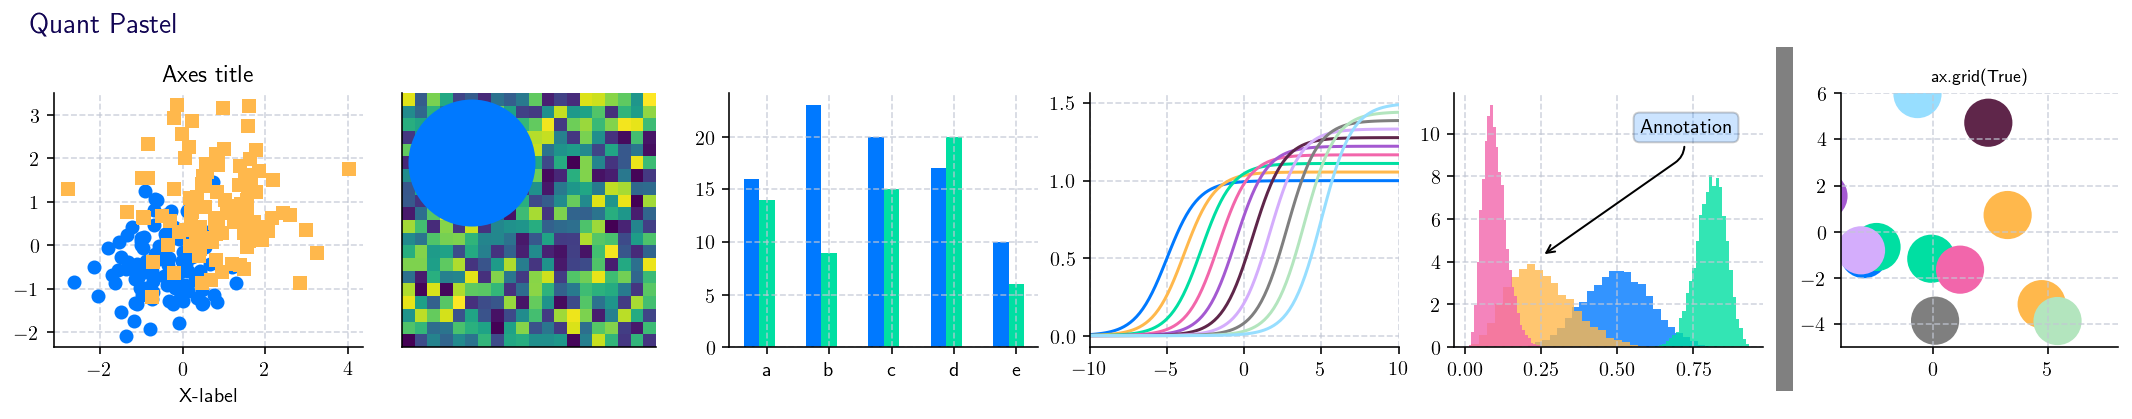

In [14]:
plt.style.use("https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle")
plot_figure(style_label='Quant Pastel')
plt.show()